## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

### 3. Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.shape

(8219, 4)

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [12]:
gdp_df = gdp_df.rename(columns = {
    "Country or Area" : "Country",
    "Value" : "GDP_Per_Capita"})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
gdp_df['Year'].nunique()

34

In [15]:
yearcounts = gdp_df.groupby(['Country'])['Year'].count()
yearcounts = yearcounts.reset_index()

In [16]:
yearcounts[(yearcounts.Year > 33)]

,Country,Year
1,Africa Eastern and Southern,34
2,Africa Western and Central,34
3,Albania,34
4,Algeria,34
5,Andorra,34
...,...,...
240,Vanuatu,34
241,Viet Nam,34
244,World,34
245,Zambia,34


In [17]:
yearcounts[(yearcounts.Year < 34)]

,Country,Year
0,Afghanistan,24
23,Bhutan,33
37,Cayman Islands,18
48,CuraÃ§ao,24
54,Djibouti,11
73,Faroe Islands,16
83,Greenland,32
115,Kosovo,16
125,Lebanon,33
152,Montenegro,27


Most countries have data for all years!

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

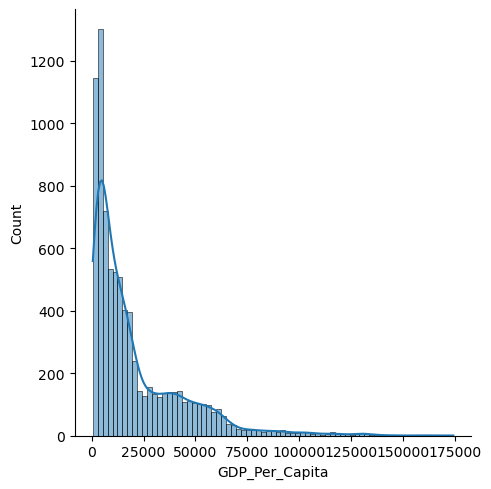

In [20]:
sns.displot( data=gdp_df["GDP_Per_Capita"], kde=True )

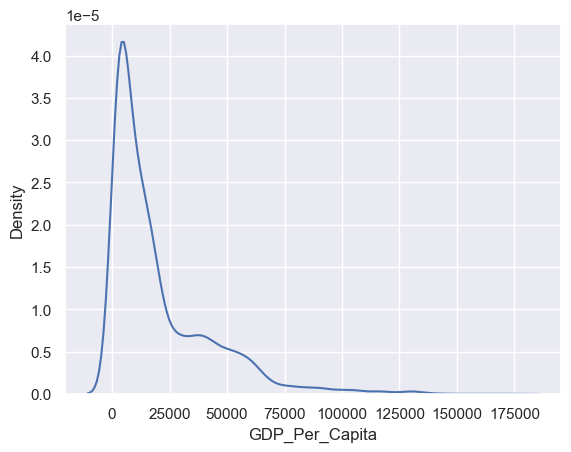

In [21]:
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_df['GDP_Per_Capita'], fill=False)
plt.show()

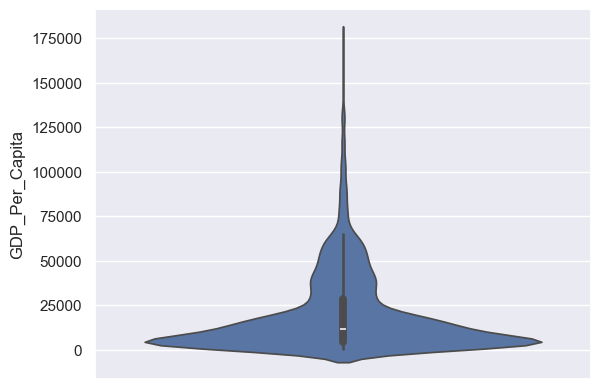

In [22]:
sns.violinplot(y=gdp_df["GDP_Per_Capita"])
plt.show()

With the histogram, I can see how many entries fall into each bin. The density plot gives me a simple idea of how the data is distributed and how many entries there are at one point versus another. I believe the violin chart is good for comparison, but here I think it just accomplishes showing a simple visual comparison at one point in the chart versus another.

### 9. What was the median GDP per capita value in 2020?

In [25]:
gdp_df.loc[gdp_df['Year'] == 2020, ['GDP_Per_Capita']].median()

GDP_Per_Capita    15309.235988
dtype: float64

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [27]:
gdp_decades = gdp_df.loc[gdp_df['Year'].isin([1990,2000, 2010, 2020])]
gdp_decades.head(3)

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475


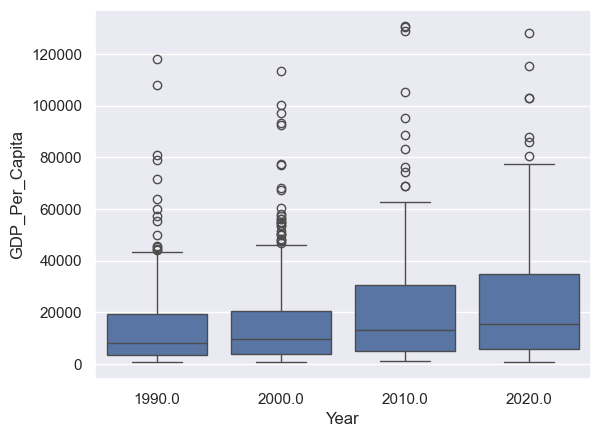

In [28]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=gdp_decades["Year"], y=gdp_df["GDP_Per_Capita"])
plt.show()

Chill, highlights heaviest and lightest distrubutions of data and still shows the overall distribution. If my stakeholder was a real nerd I would use this but...... bar chart.... in tableau... that you can click to filter...

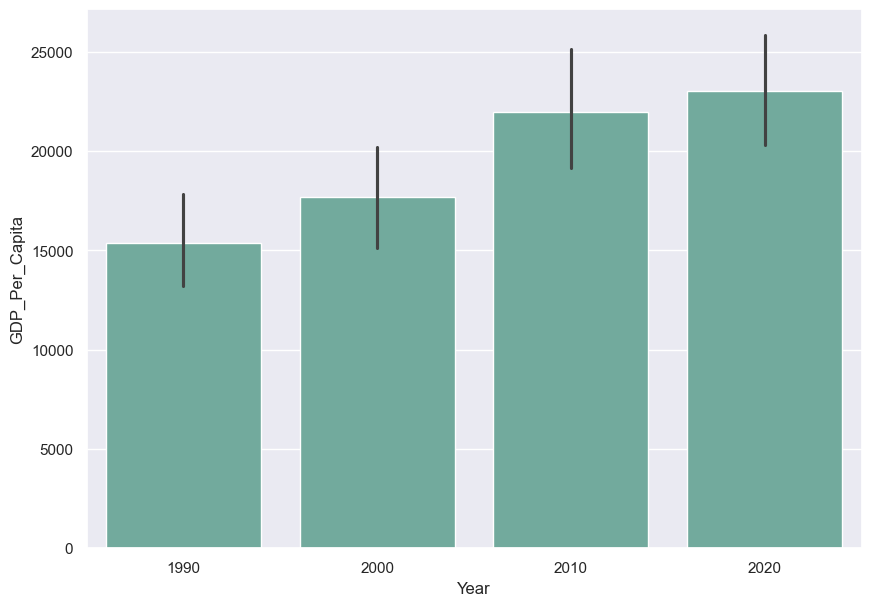

In [30]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades,  
    color='#69b3a2');

Classic bar chart can't go wrong. Love her shows great distribution and difference between decades.

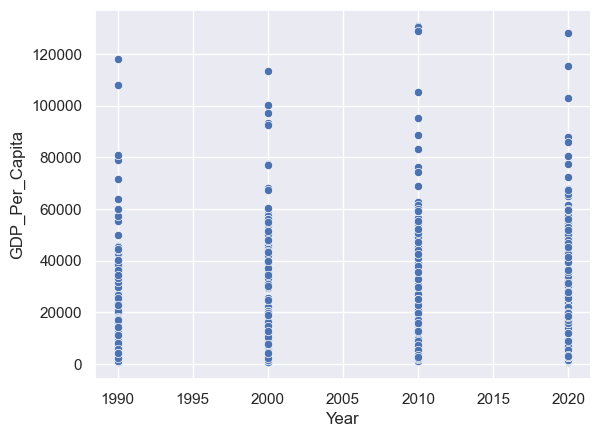

In [32]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

I don't think with the decades there's enough variation for the scatterplot to look good, I think a few violins or something would be much better!

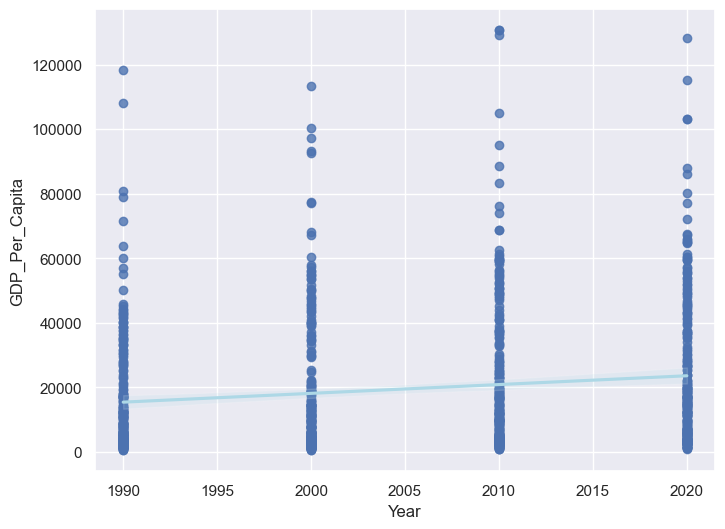

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "lightblue"},
    ax=ax
)
plt.show()

Looks sad. The line is barely doing anything. 0/10 way better use cases for this kind of chart.

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [37]:
gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values(['Year']).head(1)


,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [39]:
gdp_df[gdp_df.Year == 2020].sort_values(['GDP_Per_Capita']).tail(5)

,Country,Year,GDP_Per_Capita
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459
4426,Luxembourg,2020,128256.560341


In [40]:
gdp_df[gdp_df.Country == 'Luxembourg'].sort_values(['Year'])

,Country,Year,GDP_Per_Capita
4456,Luxembourg,1990,80947.492013
4455,Luxembourg,1991,86774.421292
4454,Luxembourg,1992,87187.534357
4453,Luxembourg,1993,89638.568901
4452,Luxembourg,1994,91804.800586
4451,Luxembourg,1995,91820.682744
4450,Luxembourg,1996,91845.705109
4449,Luxembourg,1997,95617.478227
4448,Luxembourg,1998,100738.594873
4447,Luxembourg,1999,107512.224551


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

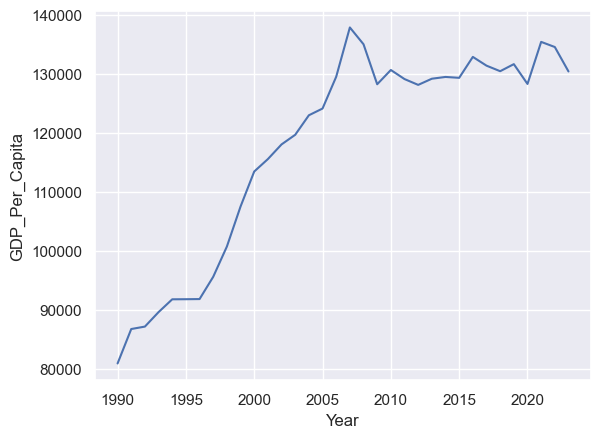

In [41]:
sns.lineplot(data=gdp_df[gdp_df.Country == 'Luxembourg'].sort_values(['Year']), x="Year", y="GDP_Per_Capita")

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [43]:
gdp_df[gdp_df.Year == 2020].sort_values(['GDP_Per_Capita']).head(5)

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

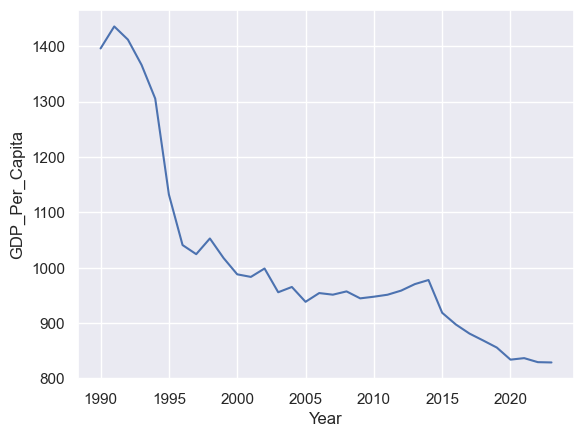

In [44]:
sns.lineplot(data=gdp_df[gdp_df.Country == 'Burundi'].sort_values(['Year']), x="Year", y="GDP_Per_Capita")

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [46]:
internet_df = pd.read_csv('../data/internet_use.csv', header =0, nrows=6083)

In [47]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [48]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [49]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [51]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df = internet_df.rename(columns = {
    "Country or Area" : "Country",
    "Value" : "Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [53]:
internet_df.groupby(internet_df['Year'].astype(int)).count()

,Country,Year,Internet_Users_Pct
Year,,,
1990,226,226,226
1991,39,39,39
1992,50,50,50
1993,66,66,66
1994,92,92,92
1995,141,141,141
1996,177,177,177
1997,188,188,188
1998,195,195,195


Looks similar to the other dataset.

### 17. What is the first year to have a non-zero internet users percentage value?

In [56]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(['Internet_Users_Pct']).head(1)

,Country,Year,Internet_Users_Pct
1889,Ethiopia,1995,0.000018


1995

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [59]:
internet_df[internet_df['Year'].isin(["2000", "2014"])]

,Country,Year,Internet_Users_Pct


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

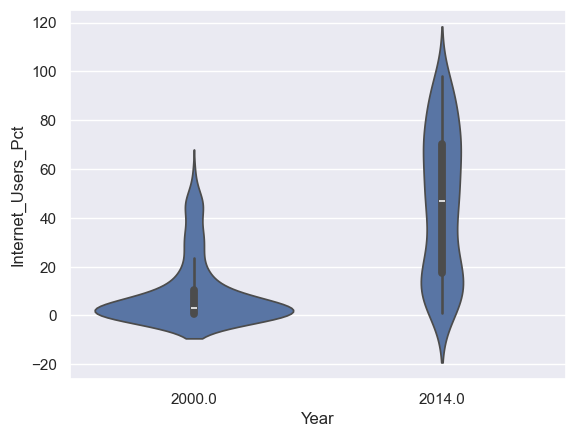

In [60]:
sns.violinplot(x=internet_df[internet_df['Year'].isin([2000, 2014])].Year, y=internet_df["Internet_Users_Pct"])

There are more users overall in 2014 versus 2000. The distribution is also more even in 2014 versus 2000.

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [63]:
internet_df[(internet_df['Internet_Users_Pct'] < 5) & (internet_df.Year == 2014)].count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

10

### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [66]:
gdp_and_internet_use = gdp_df.merge( 
    right=internet_df,
    how='outer',
    on=['Country', 'Year']
)
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [67]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,26.5883
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN


### !!!!!!!HELP!!!!!!!21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

NOTE: Although the Falkland Islands have the second highest internet_users_pct, they have not gdp_per_capita data so they are excluded from the chart.

In [70]:
gdp_and_internet_use[(gdp_and_internet_use.Year == 2014)].sort_values(['Internet_Users_Pct'], ascending=False).head(4)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.1580
2867,Falkland (Malvinas) Islands,2014,NaN,97.6000
824,Bermuda,2014,92298.387811,96.8000
6467,Norway,2014,84753.668395,96.3005


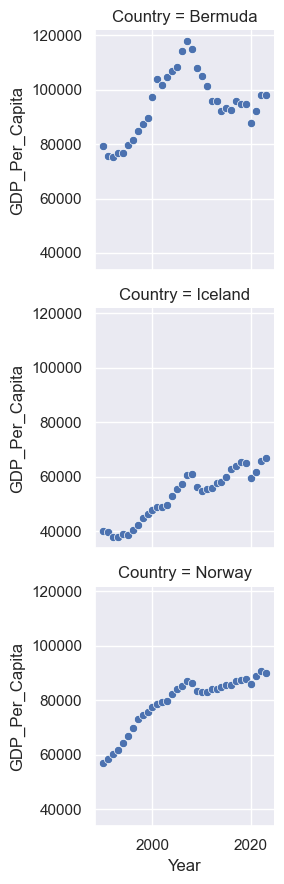

In [71]:
g = sns.FacetGrid(gdp_and_internet_use[(gdp_and_internet_use.Country.isin(["Iceland", "Bermuda", "Norway"]))], row="Country")
g.map(sns.scatterplot, "Year", "GDP_Per_Capita")

### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [73]:
gdp_and_internet_use_2014 = gdp_and_internet_use[(gdp_and_internet_use.Year == 2014)]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN
83,Africa Western and Central,2014,4816.917355,NaN
117,Albania,2014,12788.747231,54.3
151,Algeria,2014,15073.762940,29.5


### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

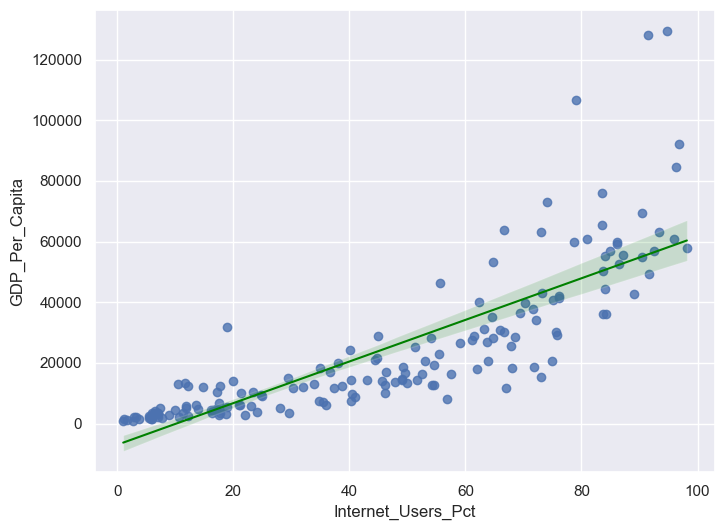

In [133]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_and_internet_use_2014["Internet_Users_Pct"],
    y=gdp_and_internet_use_2014["GDP_Per_Capita"],
    line_kws={"color": "green", "linewidth": 1.5},
    ax=ax
)
plt.show()

In [135]:
gdp_and_internet_use_2014[(gdp_and_internet_use_2014.GDP_Per_Capita > 20000) & (gdp_and_internet_use_2014.Internet_Users_Pct < 20)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2538,Equatorial Guinea,2014,31765.899706,18.86
